# Two point correlation function: Multipole decomposition

## Author: Cesar Arroyo Cardenas

In [1]:
%reset
# Import required libraries.
import numpy as np # Package for n-dimensional scientific computing.
from matplotlib import pyplot as plt # Quick plot module from the MatPlotLib package.

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


The workflow to be followed is the one described in the document: [Trabajo Grupo Cosmologia](https://docs.google.com/document/d/1mjUArJLjMPIflmWkiw5SJPDx5dBEqVSlLOUST4uWll8/edit).

### Description of files

In this notebook I will generate a multipole decomposition for a **CUTE output file**. The source file is a .xi file which corresponds to a calculation of the 2 point correlation function (2PCF) generated with given data and random files by the CUTE software.

I will describe the output according to the CUTE version used and the output format given. The type of correlation calculated by CUTE is in the parameter file as
```
corr_type= 3D_rm
```

According to the verbal and written documentation obtained, this corresponds to an output of the form 
```
For the 3-D correlation functions the output file has 7 columns with
   mu   r   xi(mu,r)   errxi(mu,r)   DD   DR   RR
```
> **Note:** This is a combination of the CUTE README and the modification made by Mariana to CUTE.

We will now follow the suggested steps in the last meeting to construct the multipoles for one single file.

### Analysis of the .xi file

The first thing to do is to inspect the .xi file in order to get a feeling about what we've obtained by running CUTE.

In [2]:
data = np.loadtxt('qpm_mock_ELG_NGC_0001.xi', usecols = (0,1,2,4,5,6))
mu = data[:, 0]
r = data[:, 1]

# Find out the shape. The non-repeated values in mu and r and
# the count of how many times they appear.
print(data.shape)
print(np.unique(mu, return_counts=True))
print(np.unique(r, return_counts=True))

# The mu and r form a 200*100 grid.
# Each value of mu appears 200 times and each value of r appears 100 times.



(20000L, 6L)
(array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995]), array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200,

 Let's see if we can plot contour surfaces for $DD(\mu,r)$, $DR(\mu,r)$ and $RR(\mu,r)$.

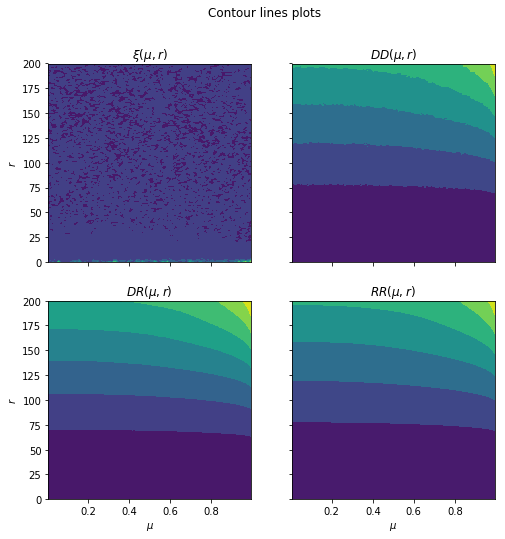

In [3]:
shape = (200, 100) # Shape for reshaping our data.

# Data is reshape in order to be able to do the contour plot.
MU = mu.reshape(shape)
R = r.reshape(shape)
XI = np.reshape(data[:, 2], shape)
DD = np.reshape(data[:, 3], shape)
DR = np.reshape(data[:, 4], shape)
RR = np.reshape(data[:, 5], shape)

# Contour plots for XI, DD, DR and RR.
f, ((axXI, axDD), (axDR, axRR)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))
f.suptitle("Contour lines plots")
axXI.set(ylabel = '$r$')
axXI.set_title(r"$\xi(\mu,r)$")
axXI.contourf(MU, R, XI)
axDD.set_title(r"$DD(\mu,r)$")
axDD.contourf(MU, R, DD)
axDR.set(xlabel = '$\mu$', ylabel = '$r$')
axDR.set_title(r"$DR(\mu,r)$")
axDR.contourf(MU, R, DR)
axRR.set(xlabel = '$\mu$')
axRR.set_title(r"$RR(\mu,r)$")
axRR.contourf(MU, R, RR)

plt.show()

Next step is to try to calculate the normalized $DD$, $DR$ and $RR$ and plot them. The normalization of the $DD$, $DR$ and $RR$ is done by using $n_r$ and $n_d$. Each of these is calculated as
\begin{equation*}
n = \sum_{\text{galaxies}} w_{\text{galaxy}}.
\end{equation*}
Where $w_{\text{galaxy}}$ is the weight of that galaxy and the summation is done over the real data ($n_d$) and the random data (artificially generated random data, $n_r$).

From this values, the normalization values of $DD$, $DR$ and $RR$ are respectively
\begin{equation*}
\frac{n_d(n_d - 1)}{2}, \quad n_dn_r, \quad \text{and} \quad \frac{n_r(n_r - 1)}{2}.
\end{equation*}

These normalization values should be used for the Landy-Szalay estimator. The Landy-Szalay estimator is normally written as
\begin{equation*}
\xi(\mu, r) = \frac{DD(\mu, r) - 2DR(\mu, r) + RR(\mu, r)}{RR(\mu, r)}.
\end{equation*}
It's very easy to see, that when the normalization values are applied. The formula can be written in a more suitable way for calculation as
\begin{equation*}
\xi_{\text{norm}} = \frac{\overline{DD} - \overline{DR} + \overline{RR}}{\overline{RR}}.
\end{equation*}
Where the barred $DD$, $DR$ and $RR$ are
\begin{equation*}
\overline{DD} = \frac{DD}{n_d(n_d - 1)}, \quad \overline{DR} = \frac{DR}{n_dn_r}, \quad\text{and}\quad
\overline{RR} = \frac{RR}{n_r(n_r - 1)}.
\end{equation*}

These are related to the normalized values by
\begin{equation*}
DD_{\text{norm}} = 2\overline{DD}, \quad DR_{\text{norm}} = \overline{DR}, \quad\text{and}\quad
DD_{\text{norm}} = 2\overline{RR}.
\end{equation*}
The normalized $DD$, $DR$ and $RR$ must coincide to good precision when plotted together.

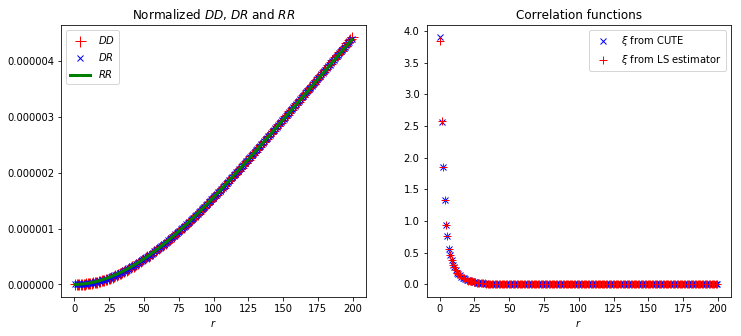

In [4]:
# Read the weights and calculate nd. The nr value was computed in Mariana's laptop.
nd = np.sum(np.loadtxt("qpm_mock_anymask_ELG_recon_specweightsSGC_0001.rdz", usecols = 3))
nr = 1112665.55362

# Normalization values for DD, DR and RR.
normdd = nd*(nd - 1.)/2.
normdr = nd*nr
normrr = nr*(nr - 1.)/2.

#Arrays to save DD, DR, RR and XI obtained from data.
DD = np.zeros(200)
DR = np.zeros(200)
RR = np.zeros(200)
XIdat = np.zeros(200)

# Average of DD, DR, RR and XI.
# We took the values from data and these were averaged in my for constant r values.
for i in np.arange(200):
    DD[i] = np.mean(data[100*i:100*(i+1),3])
    DR[i] = np.mean(data[100*i:100*(i+1),4])
    RR[i] = np.mean(data[100*i:100*(i+1),5])
    XIdat[i] = np.mean(data[100*i:100*(i+1),2])
    
# Normalize the DD, DR and RR.
DD = DD/normdd
DR = DR/normdr
RR = RR/normrr

# Vector containing non-repeated values of r.
r_arr = np.unique(r)

# First plot. Normalized DD, DR and RR.
f, (axNORM, axXI) = plt.subplots(1, 2, figsize=(12, 5))
axNORM.set_title("Normalized $DD$, $DR$ and $RR$")
axNORM.set(xlabel = '$r$')
axNORM.plot(r_arr, DD, 'r+', label = '$DD$', markersize = 11)
axNORM.plot(r_arr, DR, 'bx', label = '$DR$', markersize = 6)
axNORM.plot(r_arr, RR, 'g-', label = '$RR$', linewidth = 3)
axNORM.legend()

# Second plot. Reconstruction of XI and comparison with XI from data.

# Calculate XI using Landy-Szalay estimator.
XIcal = (DD - 2.*DR + RR)/RR

axXI.set(xlabel = '$r$')
axXI.set_title("Correlation functions")
axXI.plot(r_arr, XIdat, 'bx', label = r'$\xi$ from CUTE')
axXI.plot(r_arr, XIcal, 'r+', markersize = 8, label = r'$\xi$ from LS estimator')
axXI.legend()

plt.show()

So far we have checked roughly that our data is reliable. The second plot checked this in a more direct way.
> Reasons for "why the first plot is a proof that our data is good" are left for the future (hopefully not so far future).

The next step is to to decompose our correlation function into Legendre polynomials. With this we take away the dependence of the correlation function in $\mu$ and the multipoles are a function of $r$ only. This is going to be done by using the formula (3.3) from Angela Burden's paper [ Mitigating the Impact of the DESI Fiber Assignment on Galaxy Clustering](https://arxiv.org/abs/1611.04635) which is just the multipole decomposition in Legendre polynomials by using the simplest numerical integration method.

Multipoles are defined as
\begin{equation*}
\xi_l(r) \approx \frac{2l+1}{2}\sum_j \Delta\mu_j\xi(r,\mu_j)L_l(\mu_j).
\end{equation*}
Where $L_l$ is the Legendre polynomial of order $l$.

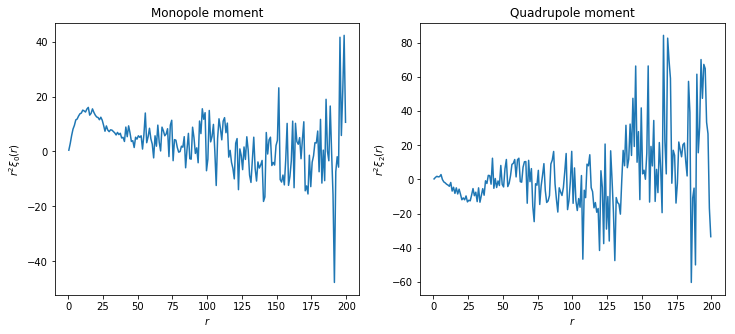

In [5]:
# Normalization values for barred DD, DR and RR.
normdd = nd*(nd - 1.)
normdr = nd*nr
normrr = nr*(nr - 1.)

# Extract DD, DR and RR values again.
dd = data[:, 3]
dr = data[:, 4]
rr = data[:, 5]
xi = np.zeros(len(dd))

# Normalization and computation of XI.
dd = dd/normdd
dr = dr/normdr
rr = rr/normrr
xi = (dd - dr + rr)/rr

# Computation of $\Delta\mu$. Mean is taken as the difference between sucessive
# $\mu$ values is approximately equal.
dmu = np.mean(np.diff(np.unique(mu)))

# Multipole array.
multipole = np.zeros((200, 2))

# Contains terms involving Legendre polynomials in the summation.
def leg_sum_term(mu, l):
    '''Returns the term $\frac{2l+1}{2}L_l(\mu)$. Where $L_l$ is the
    Legendre polynomial of order l.
    
    Args:
        mu: Float. $\mu$ value to evaluate in Legendre polynomial.
        l: Integer. Order of the Legendre polynomial.
    '''
    coeff = np.zeros(l + 1)
    coeff[l] = 1.
    return (2.*float(l) + 1.)*0.5*np.polynomial.legendre.legval(mu, coeff)

# Multipole decomposition.
for ii in np.arange(len(r_arr)):
    for jj in np.arange(100*ii,100*(ii+1)):
        multipole[ii, 0] += dmu*xi[jj]*leg_sum_term(mu[jj], 0)
        multipole[ii, 1] += dmu*xi[jj]*leg_sum_term(mu[jj], 2)

# Multipole plotting.
f, (axMON, axQUAD) = plt.subplots(1, 2, figsize=(12, 5))

axMON.set_title("Monopole moment")
axMON.set(xlabel = '$r$', ylabel = r'$r^2\xi_0(r)$')
axMON.plot(r_arr, np.power(r_arr, 2.)*multipole[:, 0])

axQUAD.set_title("Quadrupole moment")
axQUAD.set(xlabel = '$r$', ylabel = r'$r^2\xi_2(r)$')
axQUAD.plot(r_arr, np.power(r_arr, 2.)*multipole[:, 1])

plt.show()

### Other computations

In [6]:
'''
rebin = 8
DD = data[4]
DR = data[5]
RR = data[6]
#print(DD.shape, DD.T.shape)
#print(DD)
#print

# NumPy understands the shape of a vector the same independently if it's transposed or
# if it's normal.

# The reshaping is done in a row-wise fashion.

# r changes every 100 rows in original file
# Single row constitutes DD values for constant r and varying mu.

DD = DD.reshape((200, 100))
DR = DR.reshape((200, 100))
RR = RR.reshape((200, 100))

DD1 = np.zeros((25, 100))
DR1 = np.zeros((25, 100))
RR1 = np.zeros((25, 100))

#DD1 = DD[:200:8, :]
#print(DD1.shape)
#print(DD1)
for i in range(rebin):
    DD1 = DD1 + DD[i:200:8, :]
    DR1 = DR1 + DR[i:200:8, :]
    RR1 = RR1 + RR[i:200:8, :]
    
print
print(DD1.shape)

DD = DD1/float(rebin)
DR = DR1/float(rebin)
RR = RR1/float(rebin)

#MU, R = np.meshgrid(data[0,:], data[1,:])
#XI = np.reshape(data[2,:], MU.shape)

#print(type(MU), type(R), type(XI))
#print(MU.shape, R.shape, XI.shape)
#plt.pcolormesh(MU, R, XI)
#plt.show()
'''

"\nrebin = 8\nDD = data[4]\nDR = data[5]\nRR = data[6]\n#print(DD.shape, DD.T.shape)\n#print(DD)\n#print\n\n# NumPy understands the shape of a vector the same independently if it's transposed or\n# if it's normal.\n\n# The reshaping is done in a row-wise fashion.\n\n# r changes every 100 rows in original file\n# Single row constitutes DD values for constant r and varying mu.\n\nDD = DD.reshape((200, 100))\nDR = DR.reshape((200, 100))\nRR = RR.reshape((200, 100))\n\nDD1 = np.zeros((25, 100))\nDR1 = np.zeros((25, 100))\nRR1 = np.zeros((25, 100))\n\n#DD1 = DD[:200:8, :]\n#print(DD1.shape)\n#print(DD1)\nfor i in range(rebin):\n    DD1 = DD1 + DD[i:200:8, :]\n    DR1 = DR1 + DR[i:200:8, :]\n    RR1 = RR1 + RR[i:200:8, :]\n    \nprint\nprint(DD1.shape)\n\nDD = DD1/float(rebin)\nDR = DR1/float(rebin)\nRR = RR1/float(rebin)\n\n#MU, R = np.meshgrid(data[0,:], data[1,:])\n#XI = np.reshape(data[2,:], MU.shape)\n\n#print(type(MU), type(R), type(XI))\n#print(MU.shape, R.shape, XI.shape)\n#plt.pcolo

In [7]:
a = np.arange(6)
print(a)
print
print(a.reshape((2, 3)))
print
print(a.reshape((3,2)))

print np.polynomial.legendre.legval(0.5, [0., 0., 1.])

[0 1 2 3 4 5]

[[0 1 2]
 [3 4 5]]

[[0 1]
 [2 3]
 [4 5]]
-0.125
